## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data.head(5)
print("Размер таблицы", data.shape)
data

Размер таблицы (1000, 21)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
data.isna().sum() #Нет пропущенных значений
Factor_variable_data = data[['status', 'credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'other_installment_plans', 'housing', 'present_residence']]
Binary_variable_data = data[['credit_risk', 'foreign_worker', 'telephone']]
Amount_variable_data = data[['duration', 'amount', 'installment_rate', 'age', 'number_credits', 'people_liable']]
Ordered_variable_data = data[['property', 'savings', 'job']]

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [4]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [5]:
data[(data['age'] < 30) & (data['housing'] == 'rent')].count() #245 клиентов - 24,6% 
data[(data['age'] > 40) & (data['housing'] == 'rent')].count() #185 клиентов - 18,5% 

status                     185
duration                   185
credit_history             185
purpose                    185
amount                     185
savings                    185
employment_duration        185
installment_rate           185
personal_status_sex        185
other_debtors              185
present_residence          185
property                   185
age                        185
other_installment_plans    185
housing                    185
number_credits             185
job                        185
people_liable              185
telephone                  185
foreign_worker             185
credit_risk                185
dtype: int64

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [6]:
data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5') | (data['number_credits'] == '>= 6'))].count()
# 1 иностранец 

status                     1
duration                   1
credit_history             1
purpose                    1
amount                     1
savings                    1
employment_duration        1
installment_rate           1
personal_status_sex        1
other_debtors              1
present_residence          1
property                   1
age                        1
other_installment_plans    1
housing                    1
number_credits             1
job                        1
people_liable              1
telephone                  1
foreign_worker             1
credit_risk                1
dtype: int64

### Задание 6 (1 балл)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

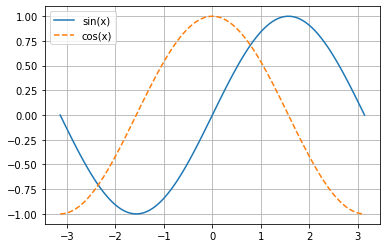

In [8]:
x = np.linspace(-np.pi, np.pi, 100)
plt.plot(x ,np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), ls='dashed', label='cos(x)')
plt.legend()
plt.grid()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

Text(0.5, 0.98, 'Status of checking account')

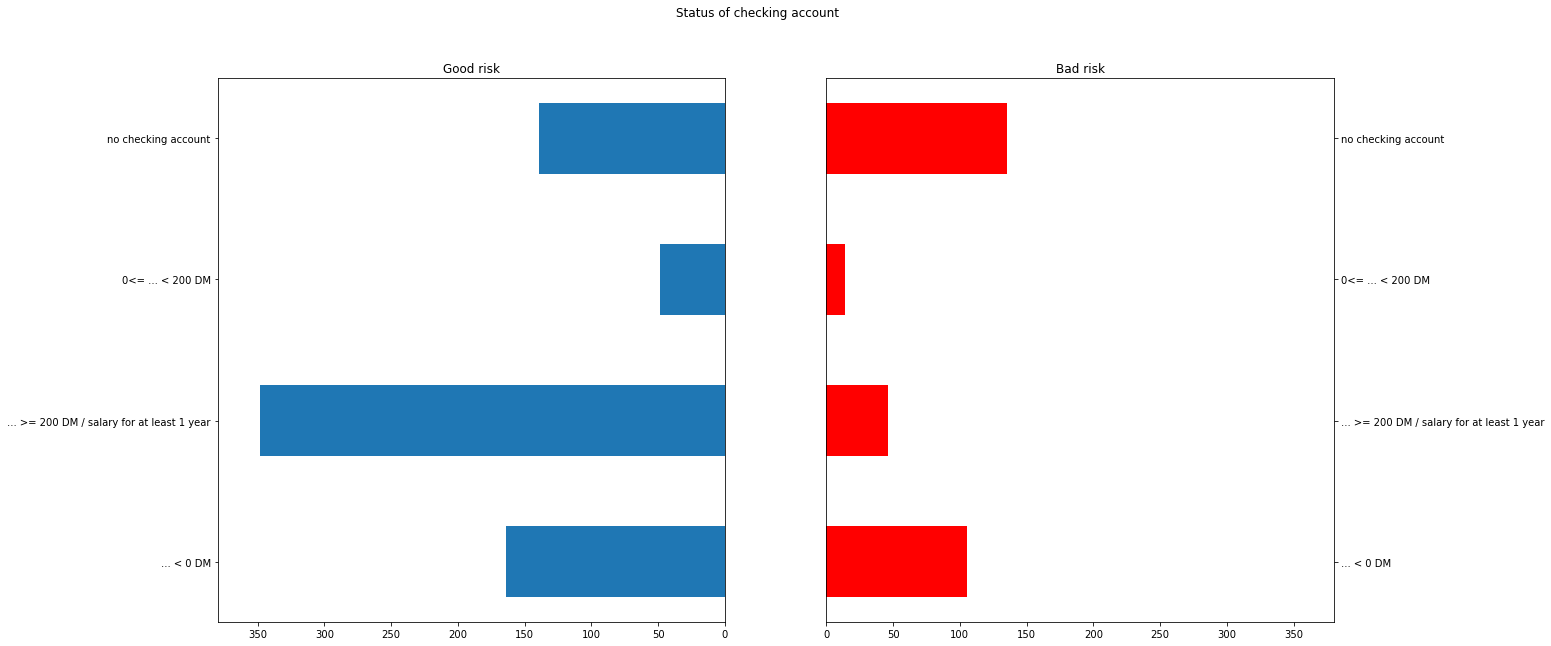

In [47]:
labels = ['... < 0 DM', '... >= 200 DM / salary for at least 1 year', '0<= ... < 200 DM', 'no checking account']
good = data[data['credit_risk'] == 'good'].groupby('status')['credit_risk'].count().unique()
bad = data[data['credit_risk'] == 'bad'].groupby('status')['credit_risk'].count().unique()


fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].barh(labels, width=good, height=0.5, tick_label=labels)
ax[0].set_title('Good risk')
ax[0].invert_xaxis()
ax[0].set_xlim(380)
ax[1].barh(labels, width=bad, height=0.5, color='red', tick_label=labels)
ax[1].yaxis.tick_right()
ax[1].set_title('Bad risk')
ax[1].set_xlim(0, 380)
fig.suptitle("Status of checking account")

### Задание 8  (0.5 балла)

In [10]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

In [11]:
sns.barplot(x='status', y='', data=data)f

SyntaxError: invalid syntax (Temp/ipykernel_8092/2856638735.py, line 1)

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

In [ ]:
# your code here

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

Text(0, 0.5, 'Count')

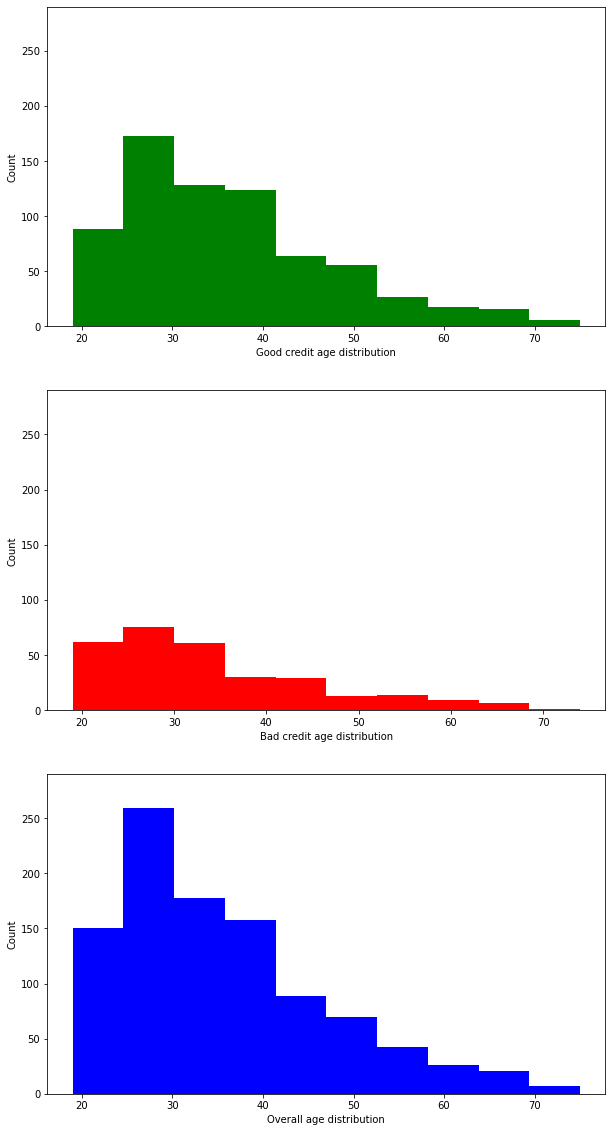

In [48]:

names = ['good risk', 'bad risk', 'overall']

fig, ax = plt.subplots(3, 1, figsize=(10, 20))

ax[0].hist(data[data['credit_risk'] == 'good']['age'], color='green')
ax[0].set_xlabel('Good credit age distribution')
ax[0].set_ylabel('Count')
ax[0].set_ylim(0, 290)
ax[1].hist(data[data['credit_risk'] == 'bad']['age'], color='red')
ax[1].set_xlabel('Bad credit age distribution')
ax[1].set_ylim(0, 290)
ax[1].set_ylabel('Count')
ax[2].hist(data['age'], color='blue')
ax[2].set_xlabel('Overall age distribution')
ax[2].set_ylim(0, 290)
ax[2].set_ylabel('Count')

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

<AxesSubplot:xlabel='amount', ylabel='duration'>

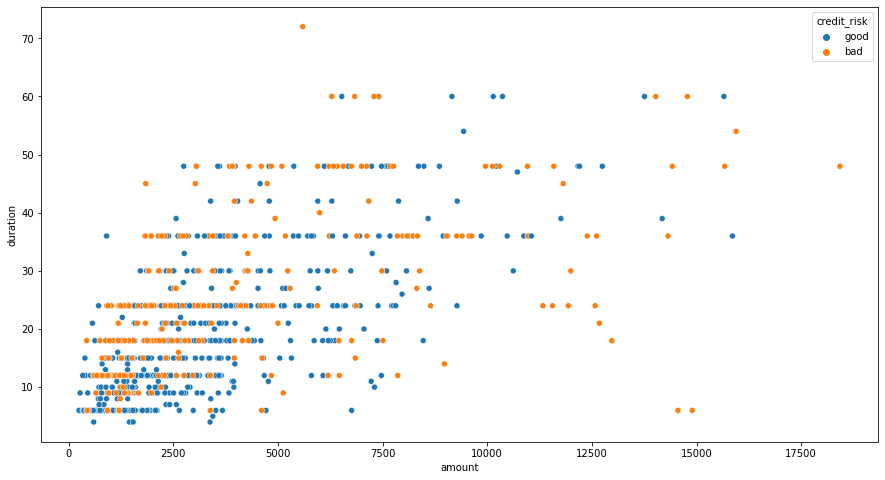

In [49]:
fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x='amount', y='duration', hue='credit_risk', data=data)

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

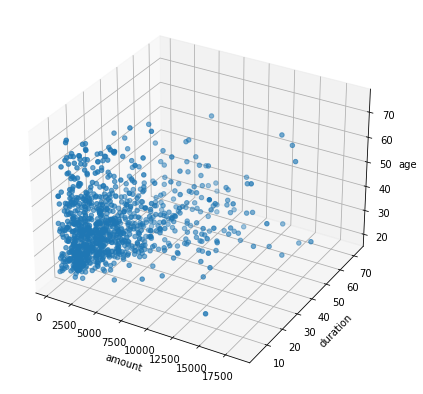

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
fig.set_size_inches(16, 7)

x = data['amount']
y = data['duration']
z = data['age']

ax.set_xlabel("amount")
ax.set_ylabel("duration")
ax.set_zlabel("age")
ax.scatter(x, y, z)

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [ ]:
Factor_variable_data = data[['status', 'credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'other_installment_plans', 'housing', 'present_residence']]
def f(x):
    a = list(x.unique())
    b = np.arange(len(a))
    return a

f(data['status'])

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [ ]:
def predict(Xtest: np.array) -> np.array:
    # your code here

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))